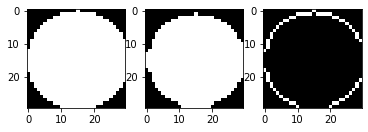

In [1]:
#gear tooth inspection using morphological filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀入圖片
img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)

# 將圖片轉為黑白
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

# 設定Kernel
kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e

# 繪製Kernel
plt.subplot(1,3,1)
plt.imshow(kernel_hole, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(kernel_hole_e, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(kernel_hole_ring, cmap = 'gray')

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)
img_d = cv2.bitwise_or(img, img_c)

# 設定各種 Kernel
kernel_gear_body = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33))
kernel_sample_ring_spacer = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(39,39))
kernel_sample_ring_width = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33))
kernel_tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel_defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17))
kernel_ring_mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

# 製作圖片e
img_d_e = cv2.erode(img_d, kernel_gear_body, iterations=1)
img_e = cv2.dilate(img_d_e, kernel_sample_ring_spacer, iterations=1) - cv2.dilate(img_d_e, kernel_sample_ring_width, iterations=1)

# 製作圖片f
img_f = cv2.bitwise_and(img_a, img_e)

# 製作圖片g
img_g = cv2.dilate(img_f, kernel_tip_spacing, iterations=1)
retval, img_g = cv2.threshold(img_g, 60, 255, cv2.THRESH_BINARY)

# 將圖片e中沒有興趣的範圍去掉(圖片中的矩形框線(黑與白的矩形邊界))
ring_mask = cv2.dilate(img_g, kernel_ring_mask, iterations=1)
img_e = cv2.bitwise_and(img_e, ring_mask)

# 製作圖片h
result_1 = (img_e - img_g)
result_2 = cv2.dilate(result_1, kernel_defect_cue, iterations=1)
retval, result_3 = cv2.threshold(result_2, 253, 255, cv2.THRESH_BINARY) # 用這張圖找瑕疵位置輪廓
result = cv2.bitwise_or(result_3, img_g)

# 將GRAY圖片轉為BGR -> 才能繪製紅色正方形
result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)

# 尋找瑕疵位置輪廓
contours, hierarchy = cv2.findContours(result_3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 走訪每一個輪廓
for con in contours:
    
    # 取得包圍的四邊形左上角的座標與長寬
    x, y, w, h = cv2.boundingRect(con)
    
    # 繪製紅色四邊形
    cv2.rectangle(result, (x,y),(x+w,y+h),(0,0,255),1)      

cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)
cv2.imshow('(e)', img_e)
cv2.imshow('(f)', img_f)
cv2.imshow('(g)', img_g)
# cv2.imshow('(result_1)', result_1)
# cv2.imshow('(result_2)', result_2)
# cv2.imshow('(result_3)', result_3)
cv2.imshow('(h-result)', result)

cv2.waitKey()
cv2.destroyAllWindows()